In [12]:
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import itertools
import functools

In [13]:
data = pd.read_csv('/content/Fish.csv', index_col = 0)

Y = data['Weight']
Y.reset_index(drop=True, inplace=True)

Y = Y.values
Y = Y.reshape((-1, 1))

sel_column = Y[:,0]
mean_val = np.nanmean(sel_column)
sel_column[np.isnan(sel_column)] = mean_val

X = data.drop(['Weight'],axis = 1)
X.reset_index(inplace=True)
X = X.values

for i in range(0,2):
  sel_column = X[:,i]
  mean_val = np.nanmean(sel_column)
  sel_column[np.isnan(sel_column)] = mean_val

X_norm = (X-np.mean(X,axis = 0))/np.std(X,axis = 0)

In [14]:
indices = np.arange(X.shape[0])
random.shuffle(indices)

In [15]:
def split_data(X,Y,Xo,indices,test_size = 0.2,random_state = 0):
  np.random.seed(random_state)
  test_size = int(test_size * len(X))

  train_indices = indices[test_size:]
  test_indices = indices[:test_size]
  X_train = [X[i] for i in train_indices]
  Y_train = [Y[i] for i in train_indices]
  X_test = [X[i] for i in test_indices]
  Y_test = [Y[i] for i in test_indices]
  Xo_train = [Xo[i] for i in train_indices]
  Xo_test = [Xo[i] for i in test_indices]

  return np.asarray(X_train), np.asarray(X_test), np.asarray(Y_train), np.asarray(Y_test),np.asarray(Xo_train),np.asarray(Xo_test)

In [16]:
def poly_trans(x,y,deg):
    for i in range(0,deg+1):
      for j in range(0,deg+1):
        if i+j <= deg:
          y = np.column_stack([y,np.multiply((x[:,0]**i),(x[:,1]**j))])
    return y

In [17]:
def bgd_reg(X_train, Y_train, X_test, Y_test, q,reg_rate, learning_rate=0.01, n_epochs=500):

  training_error = []
  testing_error = []
  weights = np.zeros((1, X_train.shape[1]))

  for epoch in range(n_epochs):
      Y_pred_train = np.matmul(X_train, weights.T)
      errors_train = Y_pred_train - Y_train

      gradient = np.zeros_like(weights)

      for j in range(X_train.shape[1]):
          if weights[0,j] == 0:
            dif_term = 0
          else:
            dif_term = q * np.sign(weights[0, j]) * (np.abs(weights[0, j]) ** (q - 1))
          gradient[0, j] = (np.dot(X_train[:, j].T, errors_train) + reg_rate * dif_term) / X_train.shape[0]

      weights -= learning_rate * gradient

      error_tr = np.sum((np.square(errors_train))) + reg_rate * np.sum(np.abs(weights) ** q)
      error_tr /= (2 * X_train.shape[0])
      training_error.append(error_tr)

      Y_pred_test = np.matmul(X_test, weights.T)
      errors_test = Y_pred_test - Y_test

      error_te = np.sum((np.square(errors_test))) + reg_rate * np.sum(np.abs(weights) ** q)
      error_te /= (2 * X_test.shape[0])
      testing_error.append(error_te)

  print(f'Training Error: {error_tr}, Testing Error: {error_te}')
  return weights, training_error, testing_error

Training Error: 11785.51366656652, Testing Error: 8795.817510154984


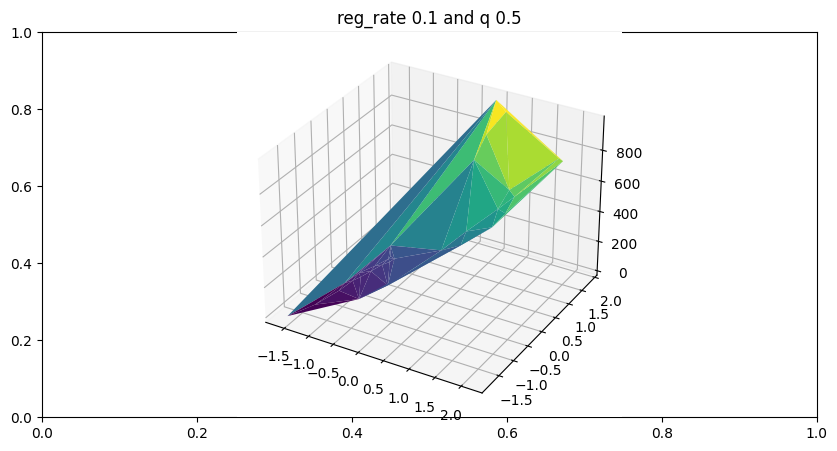

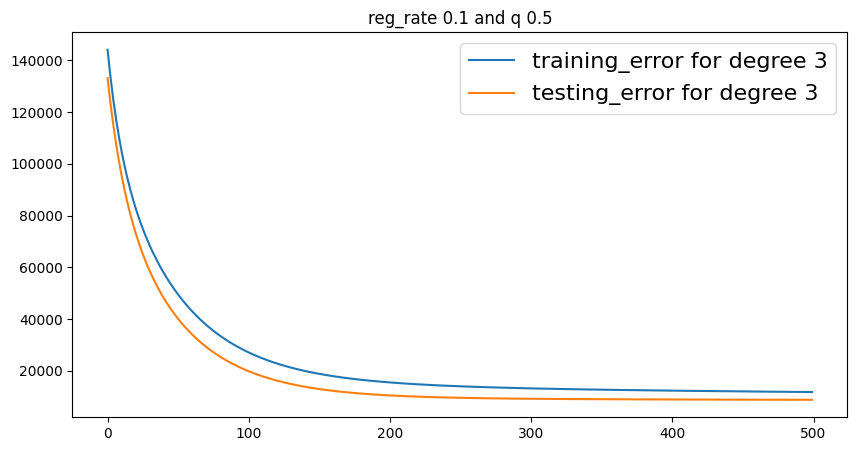

Training Error: 11785.809810051665, Testing Error: 8797.07262631937


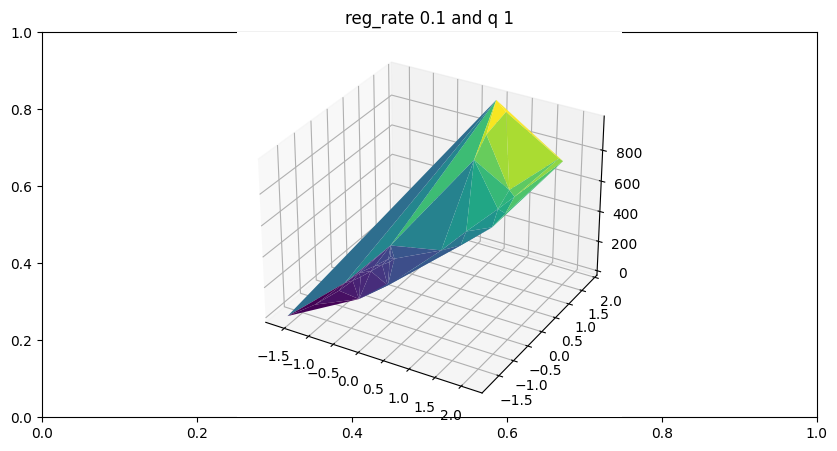

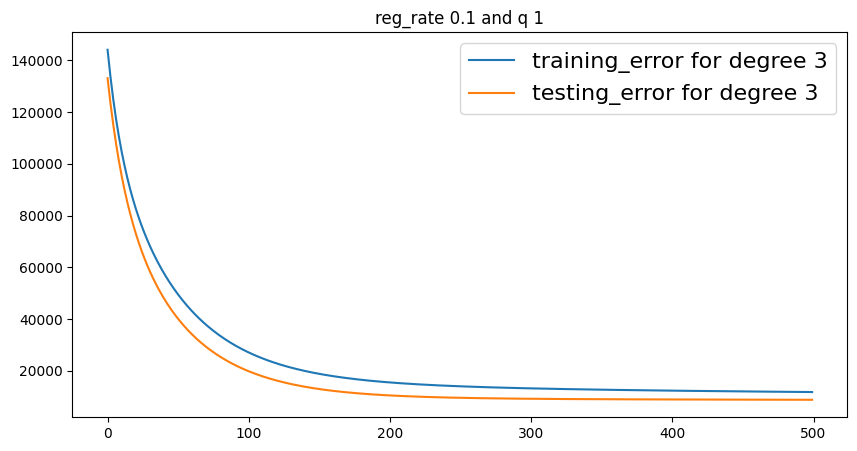

Training Error: 11883.622497813998, Testing Error: 9153.228465903356


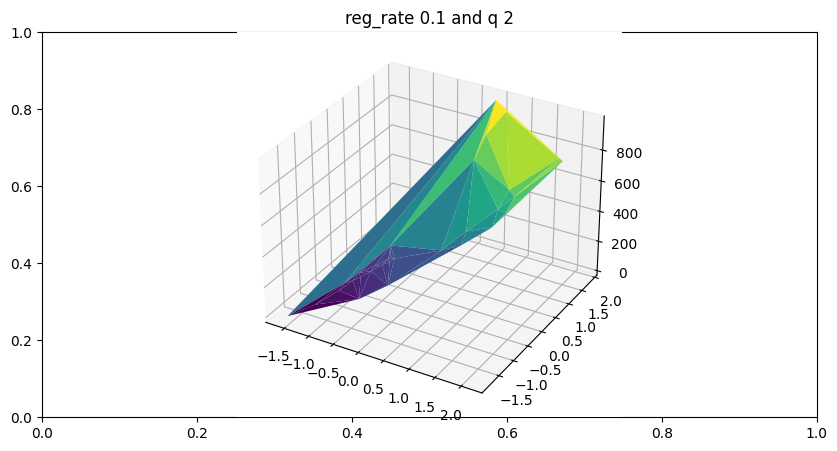

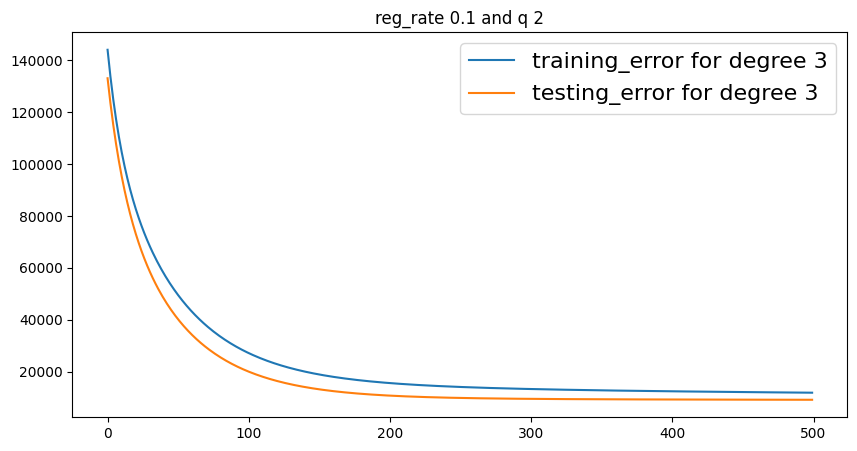

Training Error: 96200.61692860692, Testing Error: 101717.61935342879


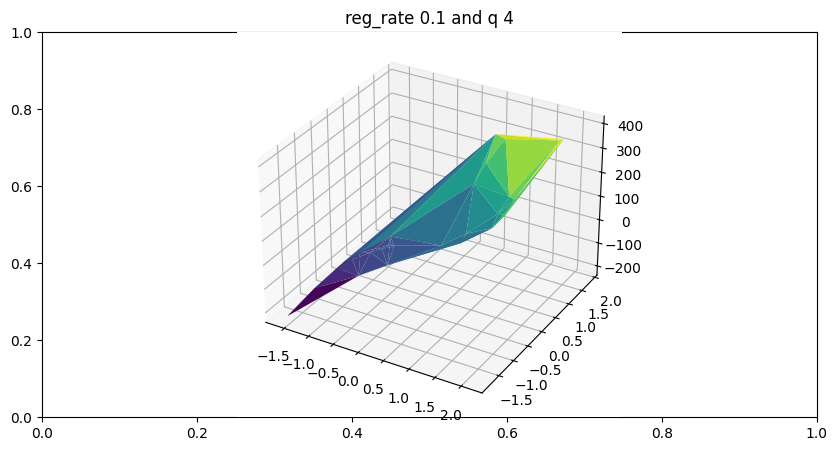

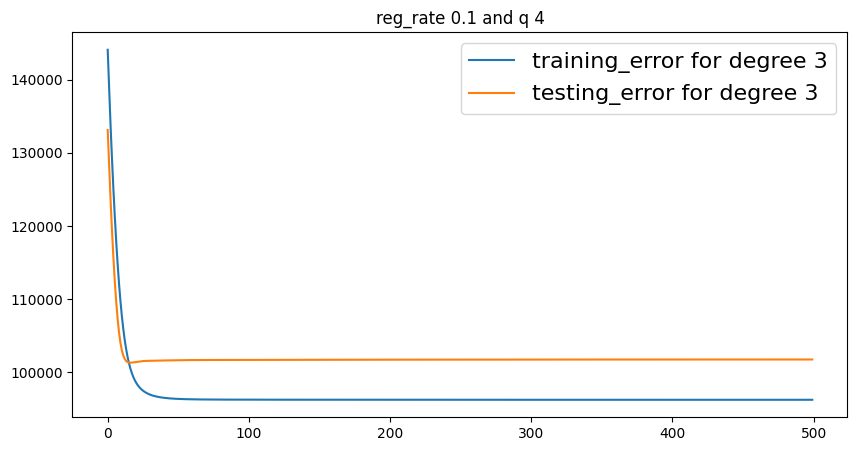

Training Error: 11785.714864420983, Testing Error: 8796.782762935865


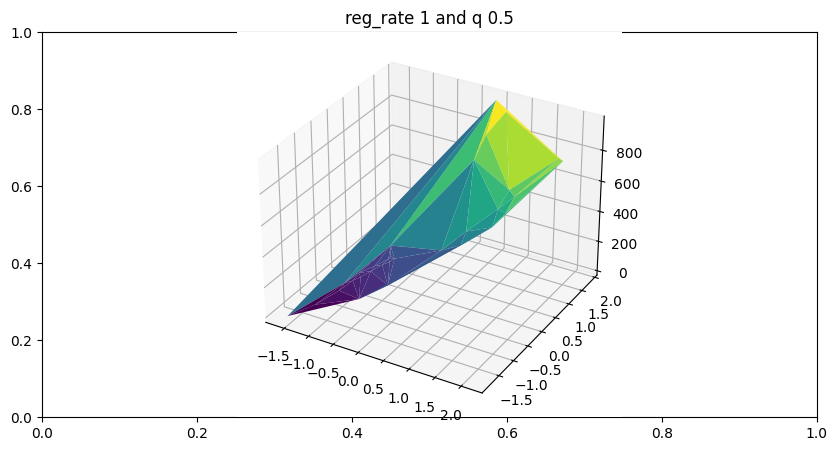

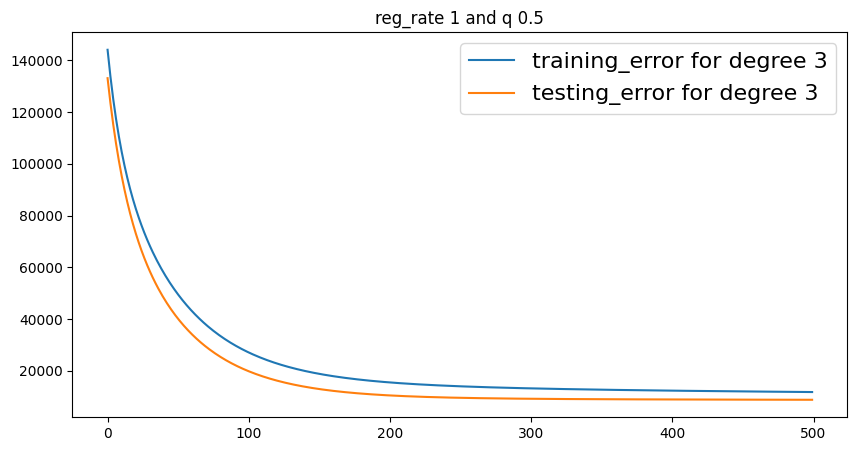

Training Error: 11788.68123745363, Testing Error: 8809.34909026726


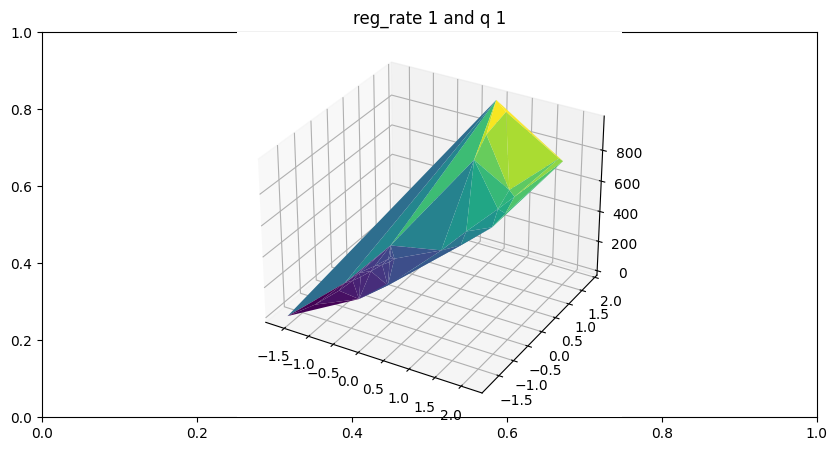

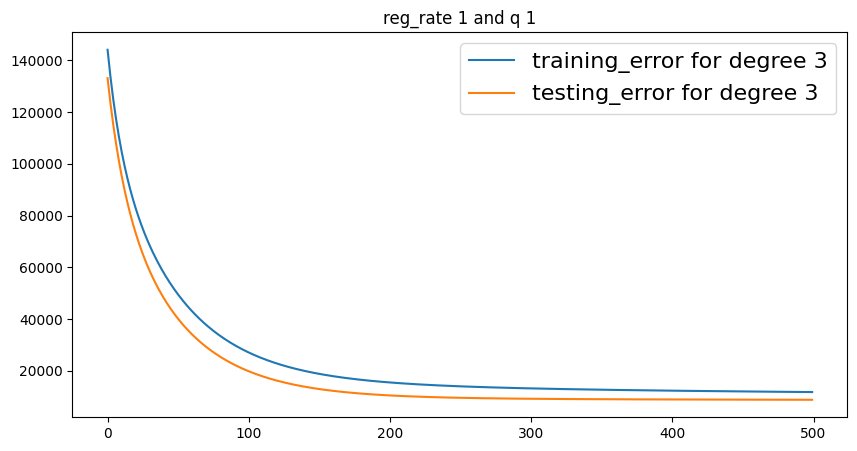

Training Error: 12759.605977176652, Testing Error: 12287.153085614547


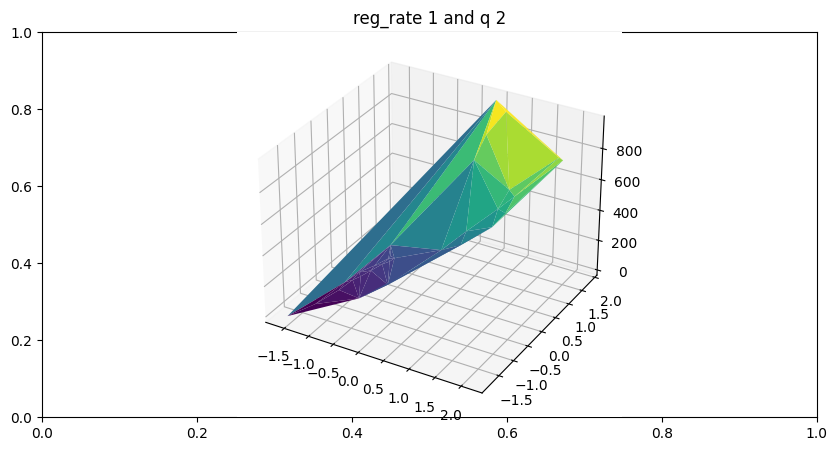

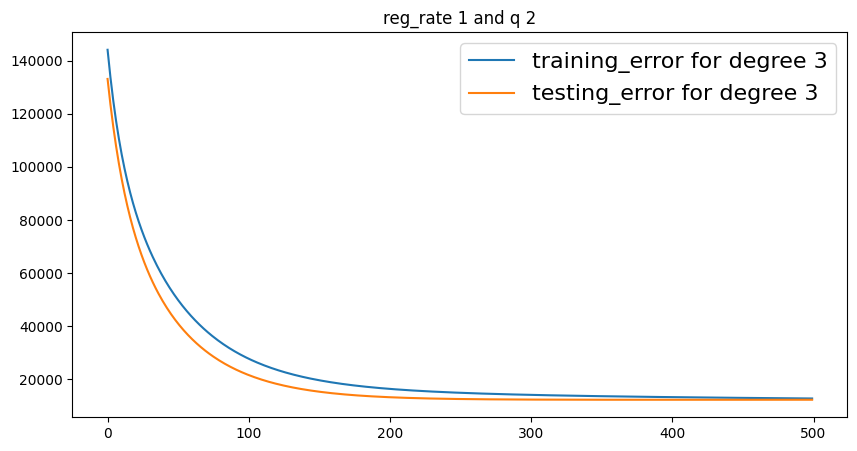

Training Error: 116110.39590808179, Testing Error: 119370.67243251829


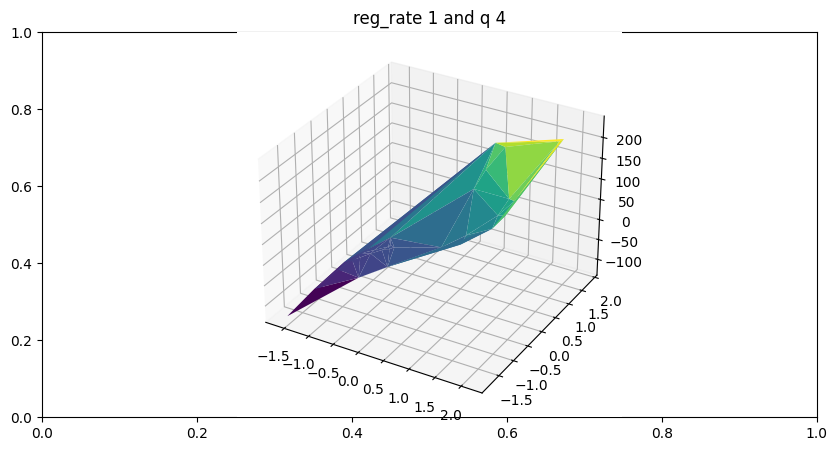

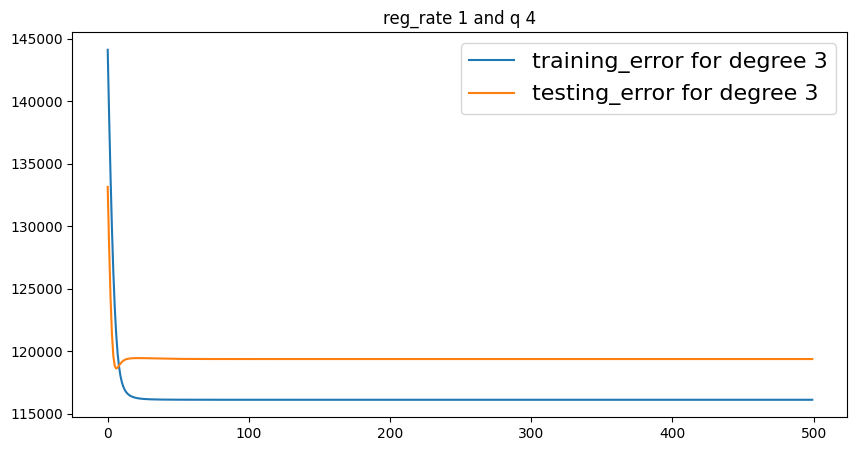

Training Error: 11785.49306136508, Testing Error: 8795.719277365773


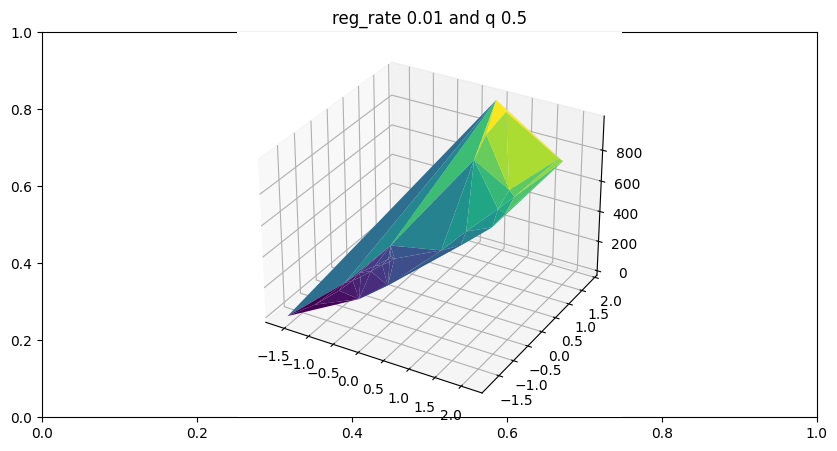

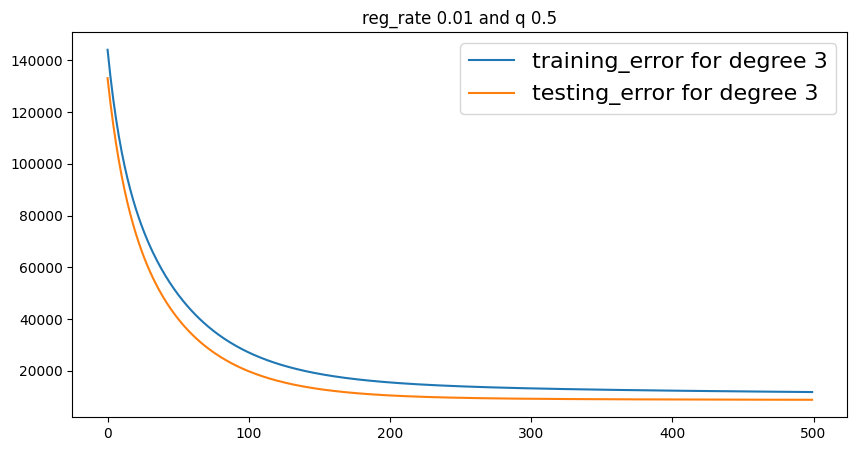

Training Error: 11785.522676416278, Testing Error: 8795.844832980742


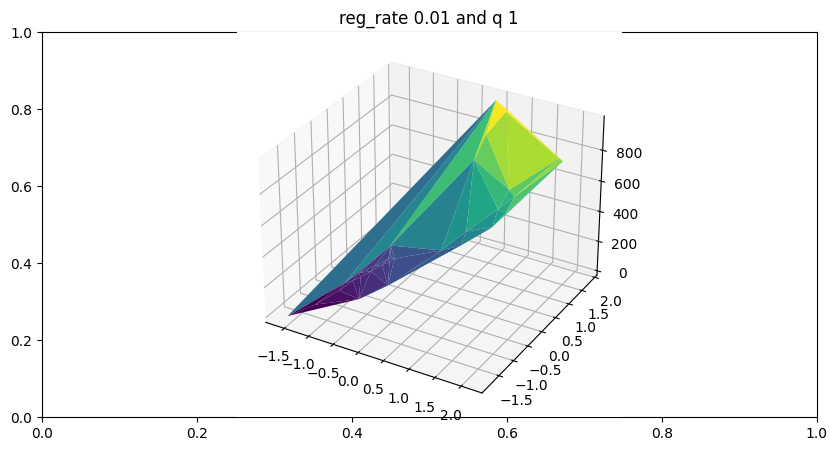

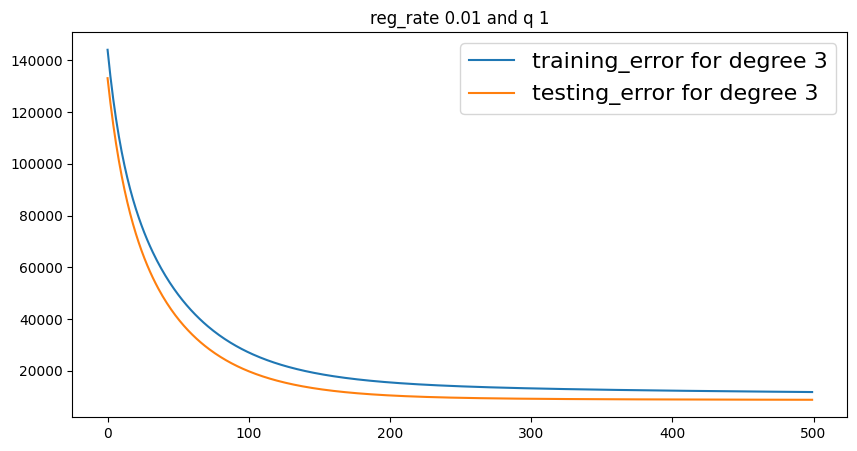

Training Error: 11795.31123689964, Testing Error: 8831.546280082706


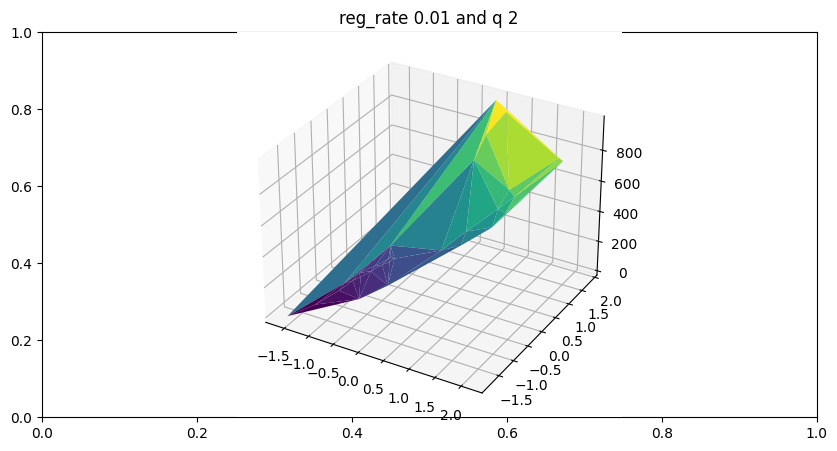

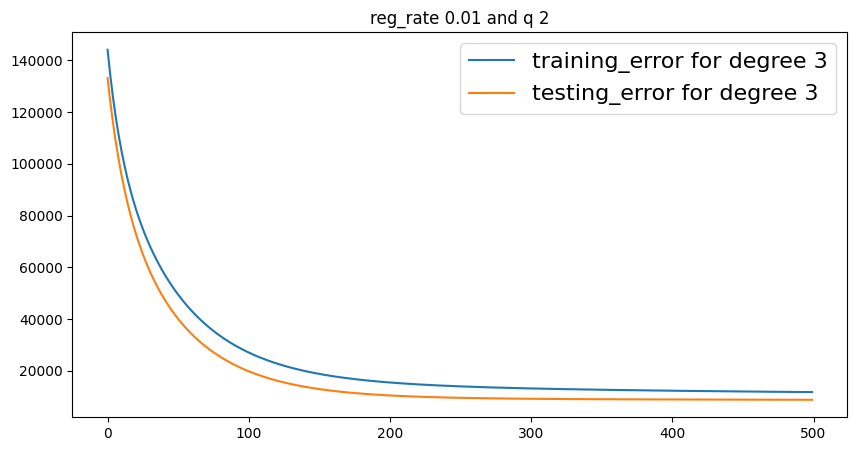

Training Error: 71852.15986122449, Testing Error: 78319.91917245158


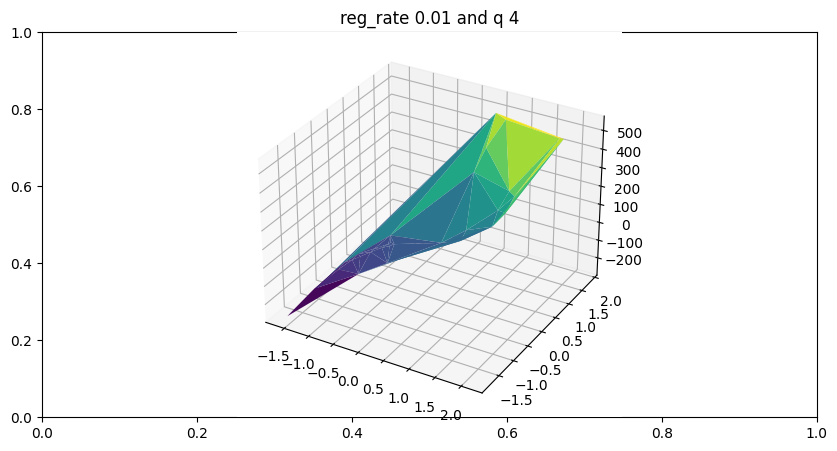

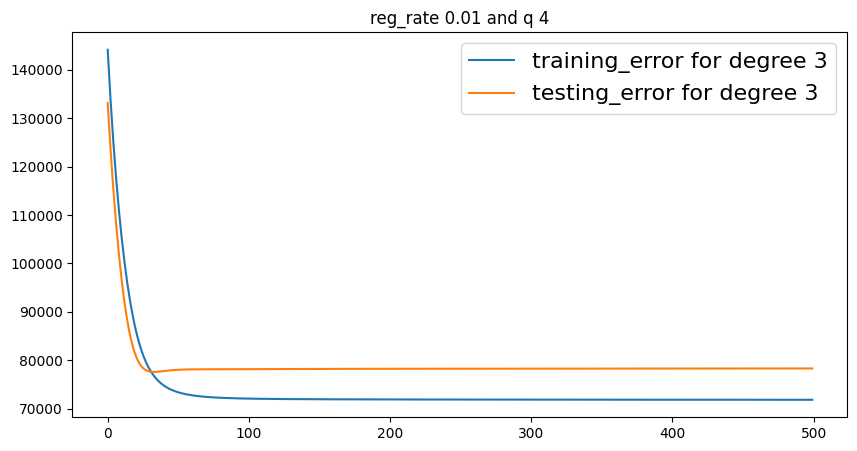

Training Error: 11785.490795340555, Testing Error: 8795.708518886933


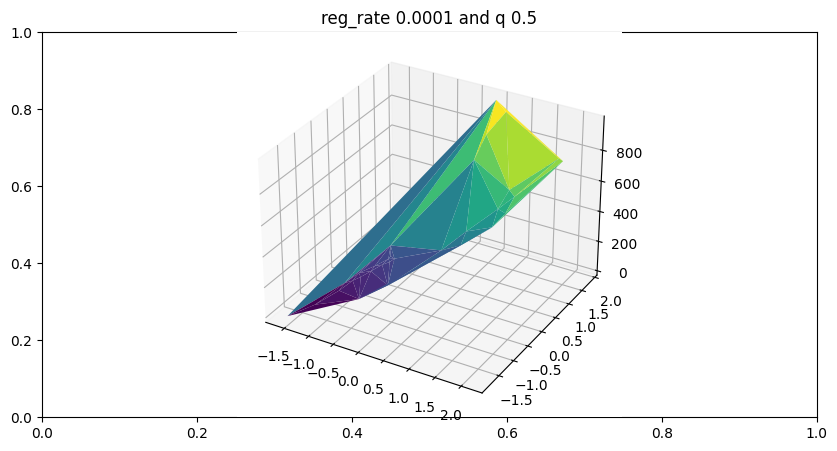

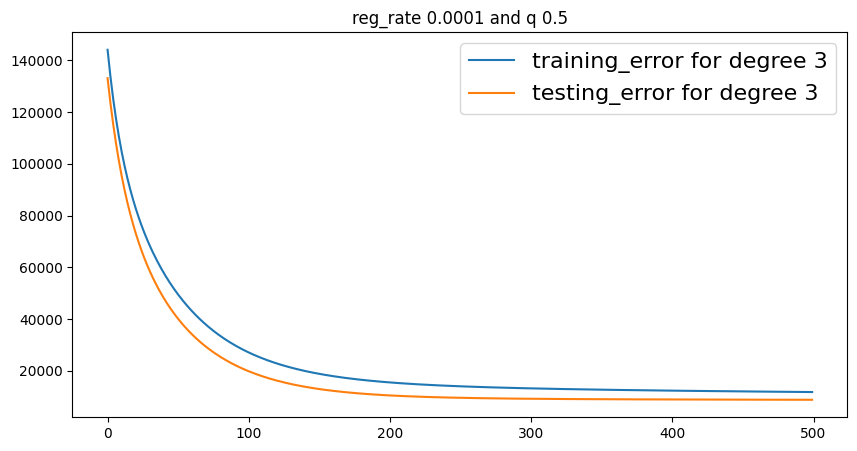

Training Error: 11785.491091491136, Testing Error: 8795.709774466635


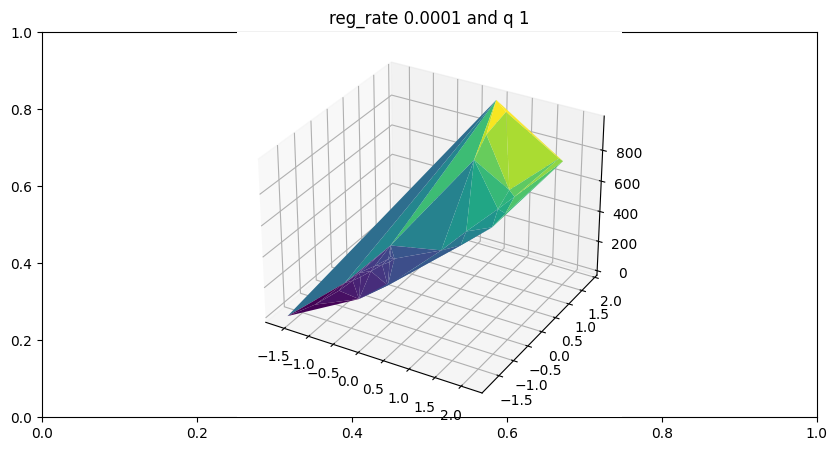

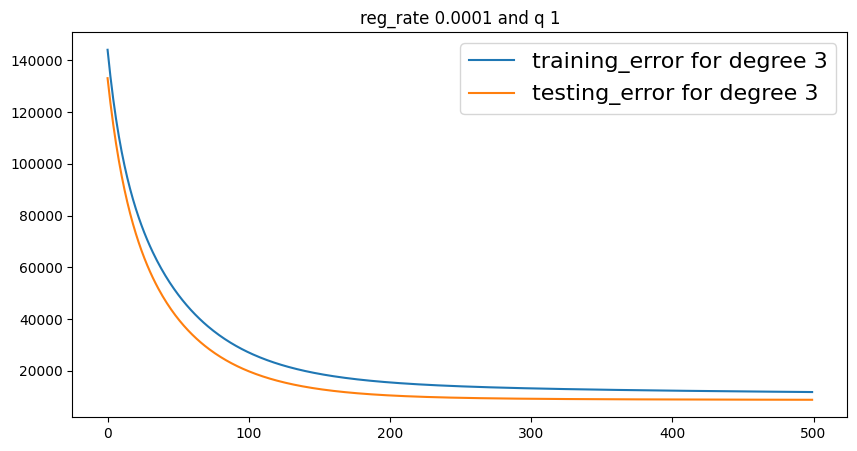

Training Error: 11785.588985127097, Testing Error: 8796.06688362665


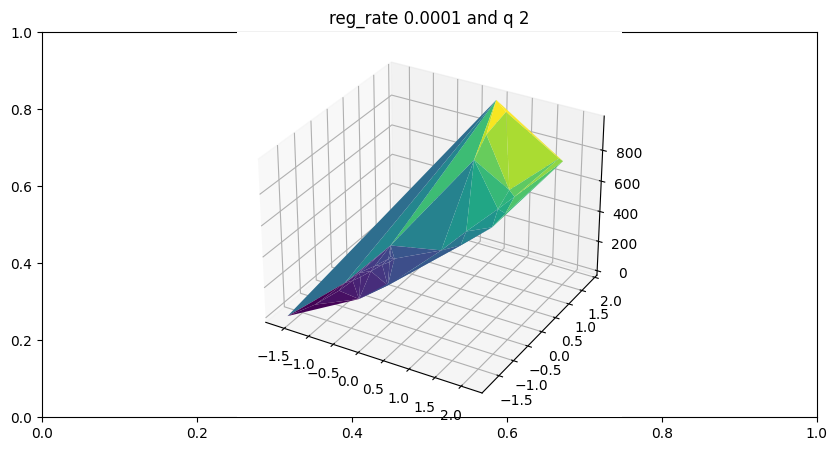

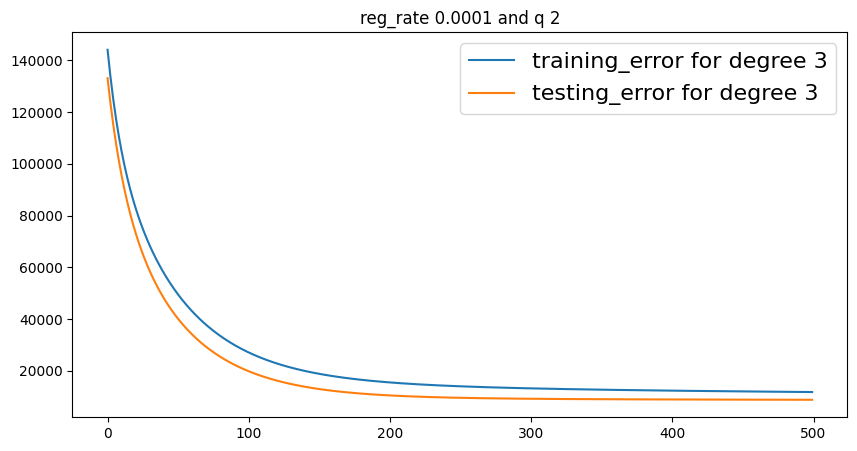

Training Error: 20854.183318526848, Testing Error: 28661.798483428687


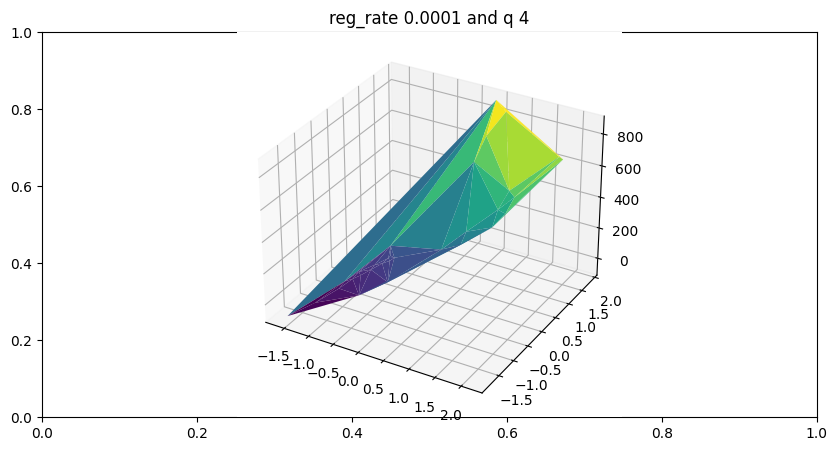

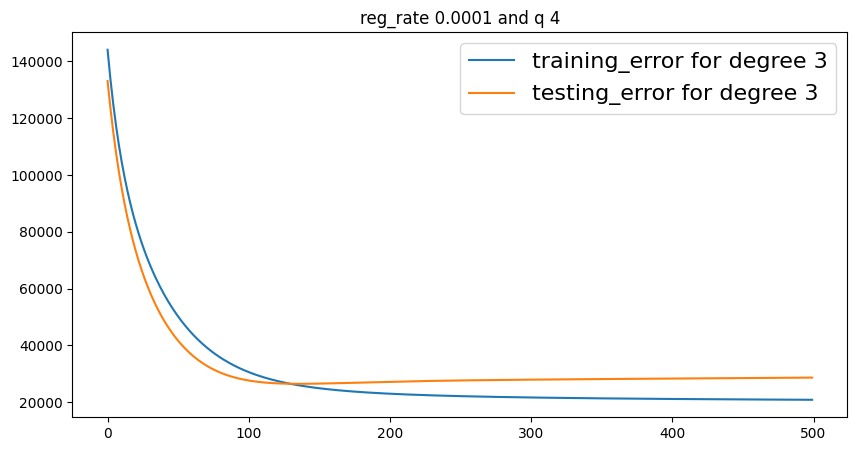

Training Error: 11785.491001344006, Testing Error: 8795.709496747048


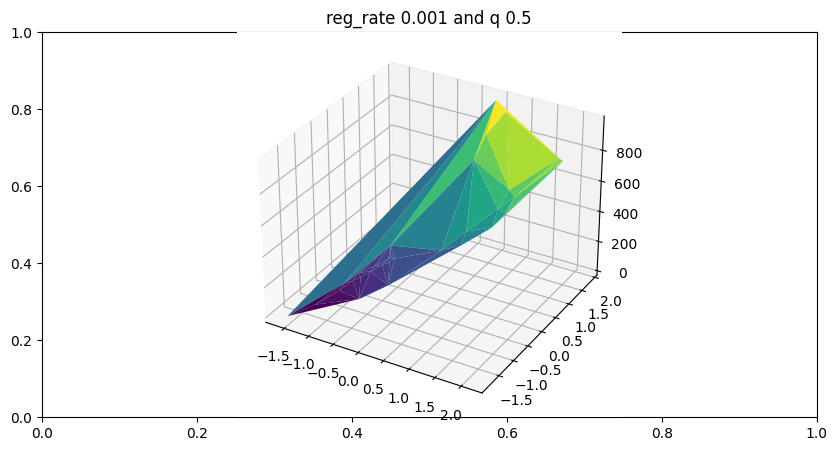

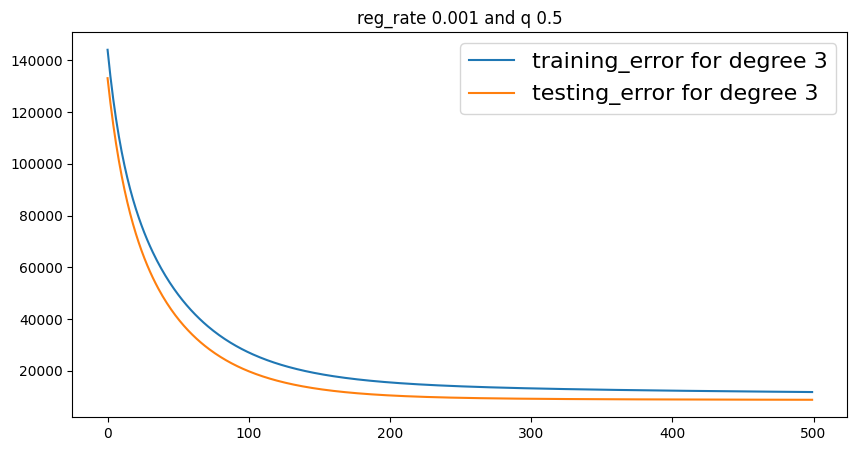

Training Error: 11785.493962849812, Testing Error: 8795.722052523583


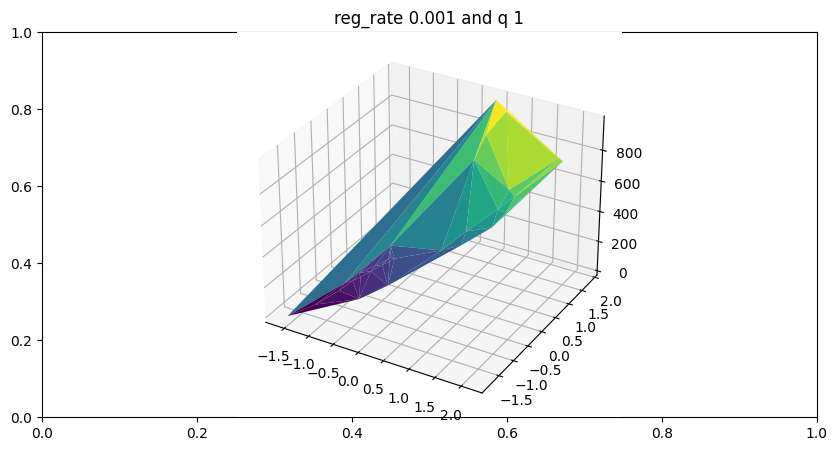

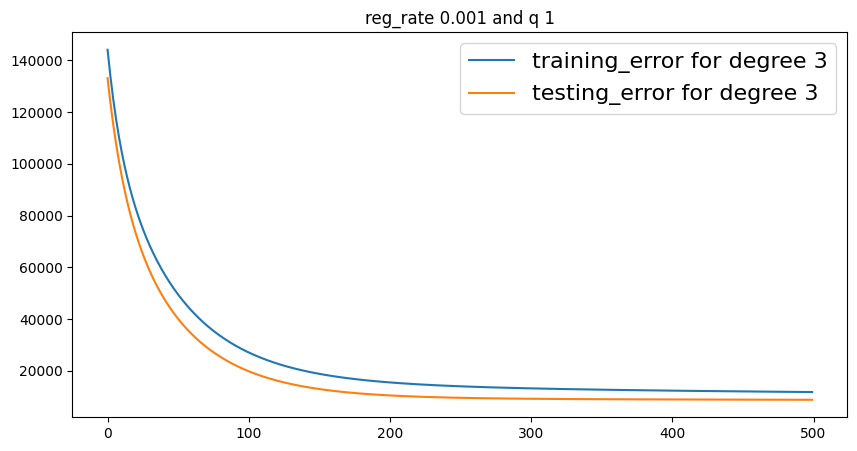

Training Error: 11786.472891907575, Testing Error: 8799.293058023197


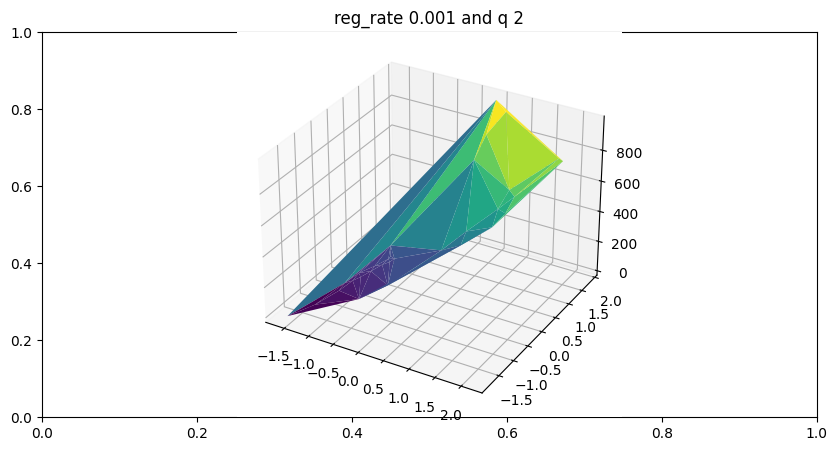

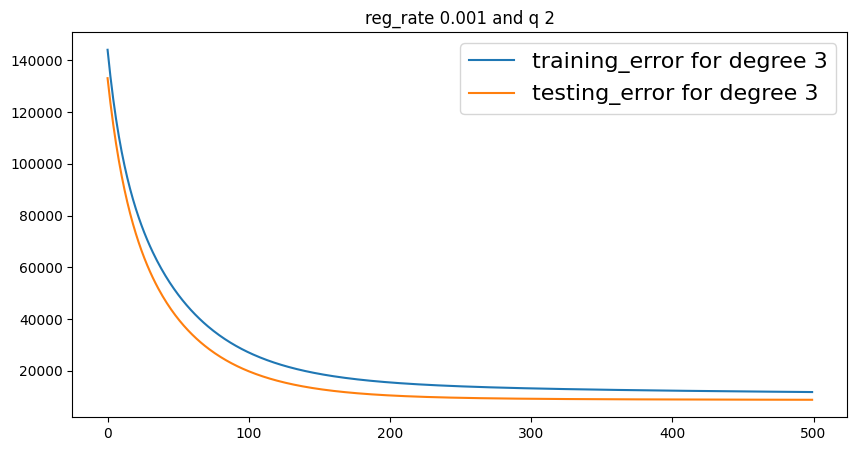

Training Error: 44063.21762195072, Testing Error: 54301.19136526598


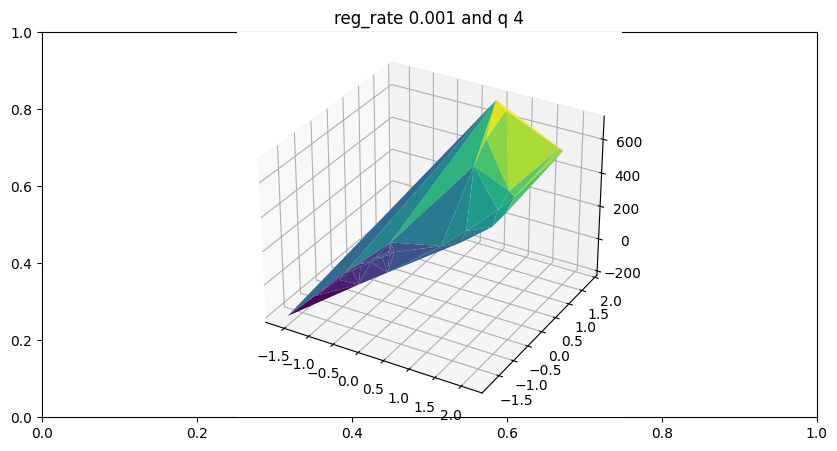

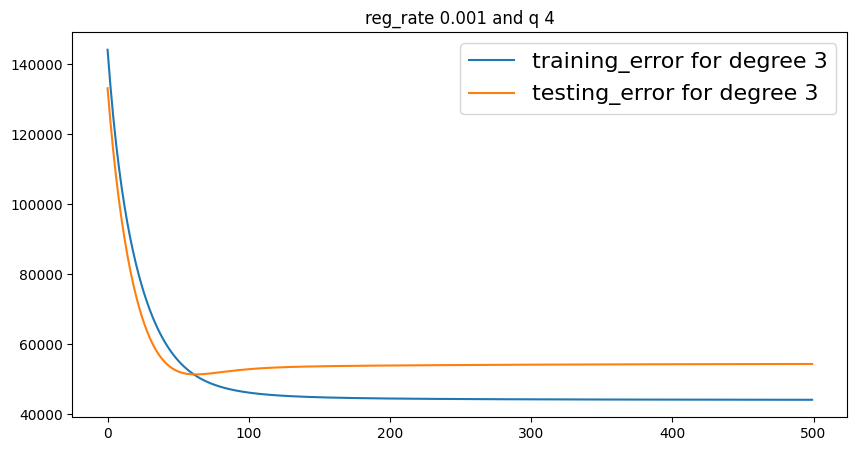

In [9]:
for reg_r in {0.0001,0.001,0.01,0.1,1}:
  for q in {0.5,1,2,4}:
    dum = np.zeros((X.shape[0],1))
    X_transformed = poly_trans(X_norm,dum,3)
    X_transformed = X_transformed[:,1:]

    X_transformed = np.delete(X_transformed,0,axis = 1)
    X_transformed = (X_transformed-np.mean(X_transformed,axis = 0))/np.std(X_transformed,axis = 0)
    X_transformed = np.insert(X_transformed,0,1,axis = 1)

    X_train, X_test, Y_train, Y_test, Xo_train, Xo_test = split_data(X_transformed, Y, X_norm, indices, test_size = 0.2, random_state = 0)

    weights,training_error,testing_error = bgd_reg(X_train, Y_train ,X_test, Y_test,q,reg_r)
    pred_y = np.dot(X_test,weights.T)

    pred_y = pred_y.reshape(-1,)
    fig = plt.figure(figsize = (10,5))

    plt.title(f'reg_rate {reg_r} and q {q}')
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(Xo_test[:,0],Xo_test[:,1],pred_y,cmap ='viridis')
    plt.show()

    plt.figure(figsize=(10,5))
    plt.plot(training_error, label= f'training_error for degree {3}')
    plt.plot(testing_error, label= f'testing_error for degree {3}')
    plt.title(f'reg_rate {reg_r} and q {q}')
    plt.legend(prop={'size': 16})
    plt.show()

In [10]:
def sgd_reg(X_train, Y_train, X_test, Y_test, q, reg_rate,learning_rate=0.01, n_epochs=500):

  training_error = []
  testing_error = []
  weights = np.zeros((1, X_train.shape[1]))

  for epoch in range(n_epochs):

      gradient = np.zeros_like(weights)

      random_index = np.random.randint(X_train.shape[0])
      x = X_train[random_index]
      y = Y_train[random_index]

      for j in range(X_train.shape[1]):
          if weights[0,j] == 0:
            dif_term = 0
          else:
            dif_term = q * np.sign(weights[0, j]) * (np.abs(weights[0, j]) ** (q - 1))
          gradient[0,j] = (-1 * (x[j] * (y - np.dot(x, weights.T)) - reg_rate * dif_term))
      weights -= learning_rate * gradient

      Y_pred_train = np.matmul(X_train, weights.T)
      errors_train = Y_pred_train - Y_train
      error_tr = np.sum((np.square(errors_train))) + reg_rate * np.sum(np.abs(weights) ** q)
      error_tr /= (2 * X_train.shape[0])
      training_error.append(error_tr)

      Y_pred_test = np.matmul(X_test, weights.T)
      errors_test = Y_pred_test - Y_test

      error_te = np.sum((np.square(errors_test))) + reg_rate * np.sum(np.abs(weights) ** q)
      error_te /= (2 * X_test.shape[0])
      testing_error.append(error_te)

  print(f'Training Error: {error_tr}, Testing Error: {error_te}')
  return weights, training_error, testing_error

Training Error: 12130.02607819216, Testing Error: 7832.347301732102


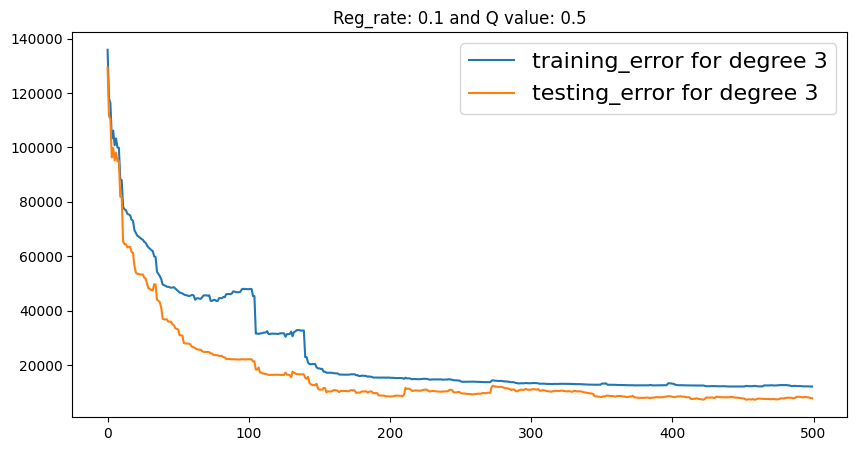

Training Error: 12125.773590886278, Testing Error: 7829.807396326601


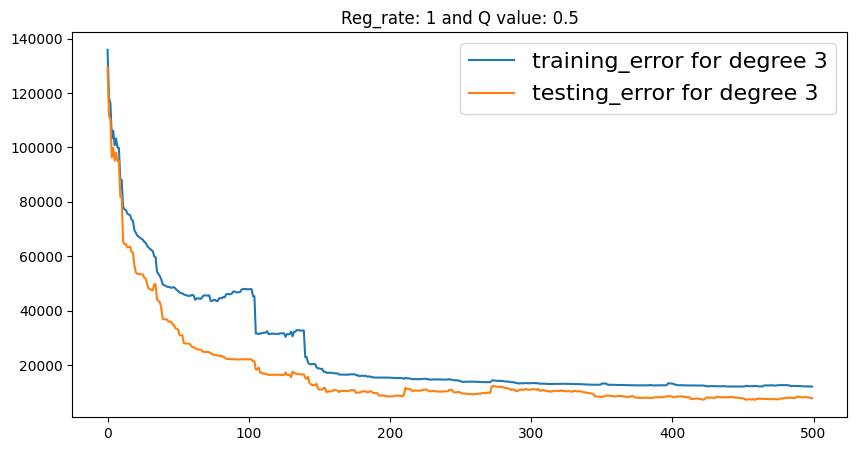

Training Error: 12130.526800538913, Testing Error: 7832.393075885099


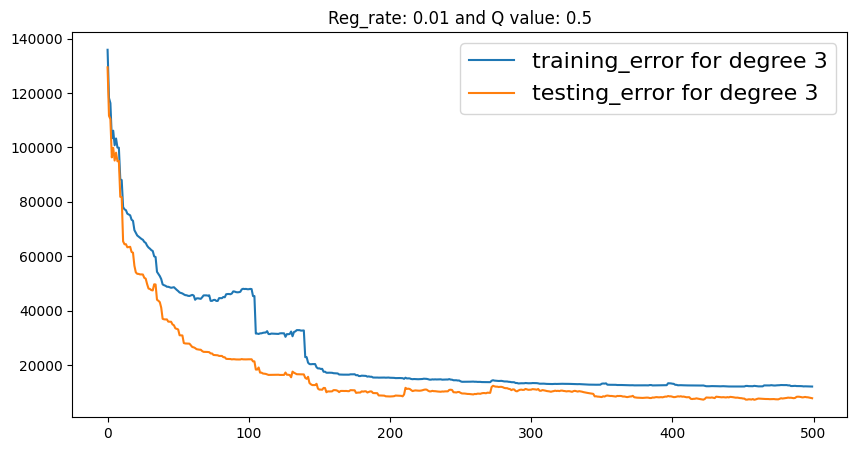

Training Error: 12130.58827691633, Testing Error: 7832.416554311117


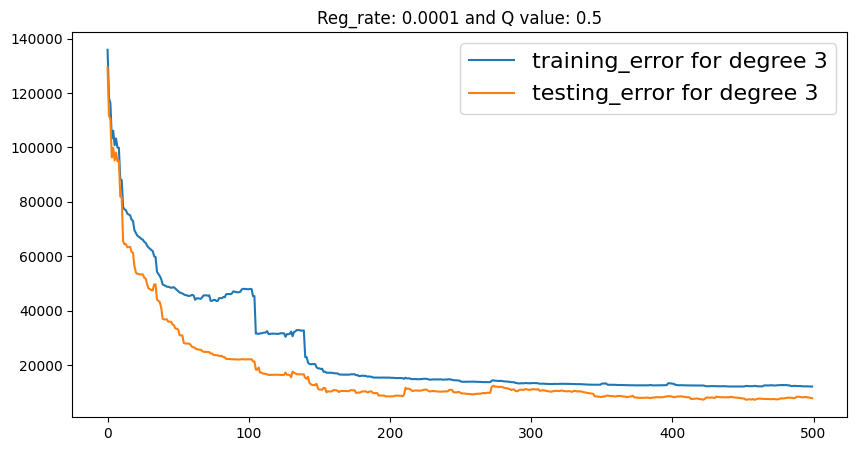

Training Error: 12130.582729091, Testing Error: 7832.414433579071


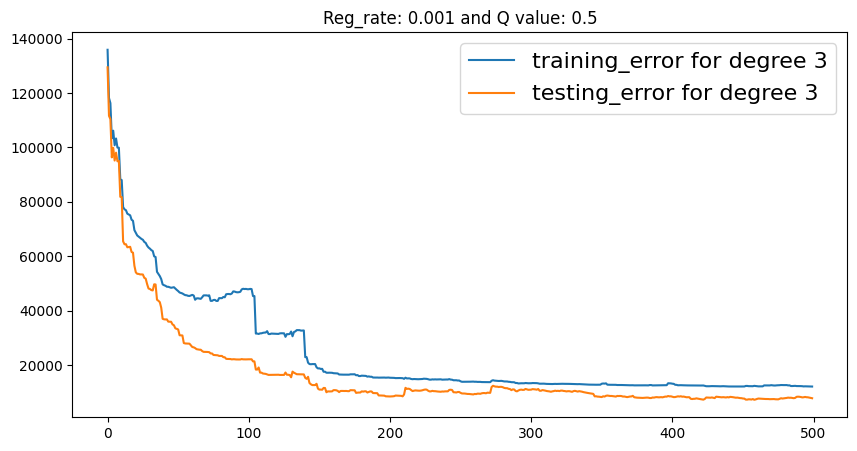

Training Error: 12126.713922818024, Testing Error: 7837.53561432209


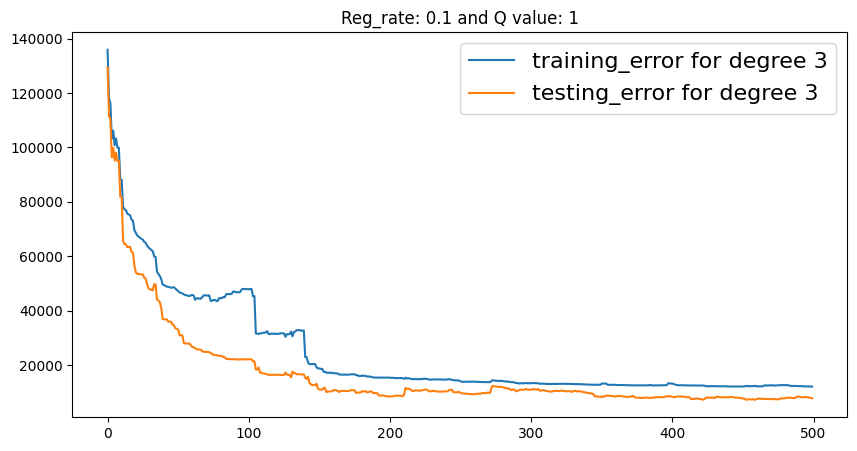

Training Error: 12095.771839807016, Testing Error: 7885.296527873894


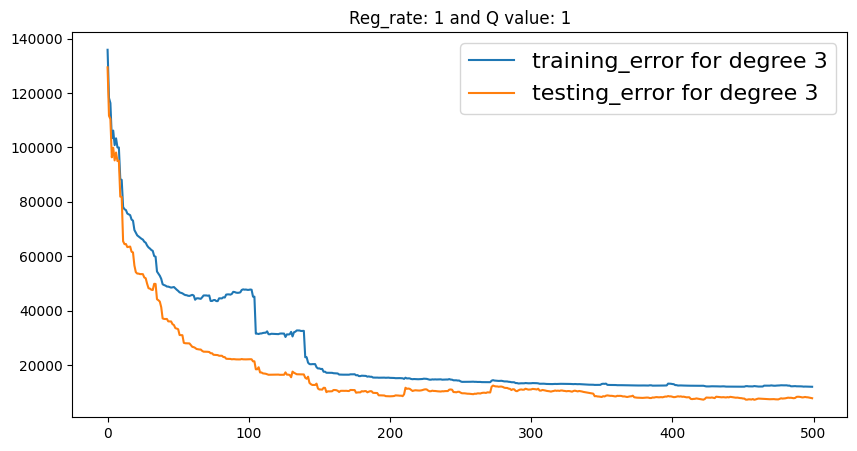

Training Error: 12130.195136506543, Testing Error: 7832.929898380854


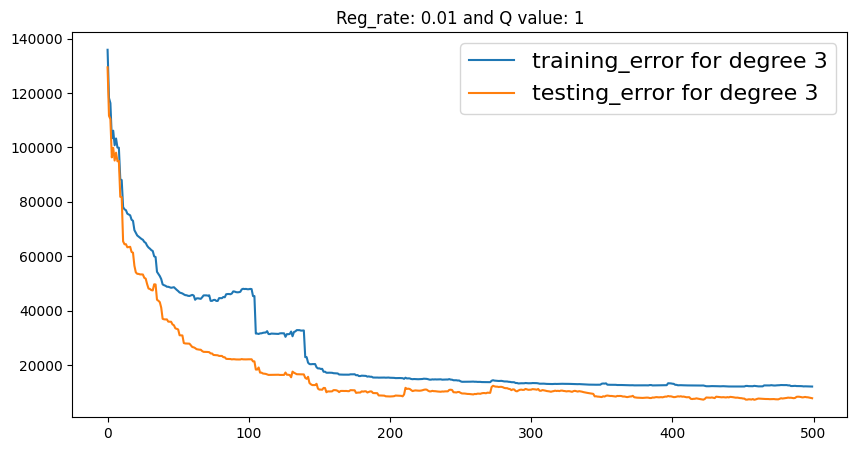

Training Error: 12130.584951951567, Testing Error: 7832.421914934687


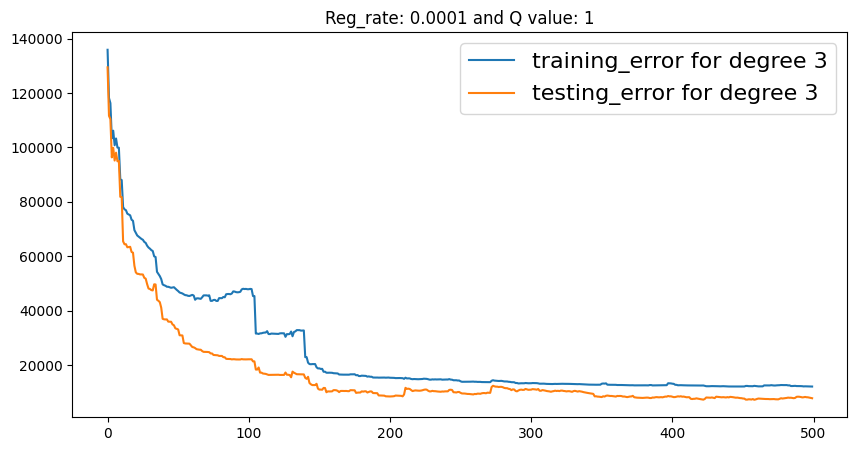

Training Error: 12130.549485572697, Testing Error: 7832.468042633446


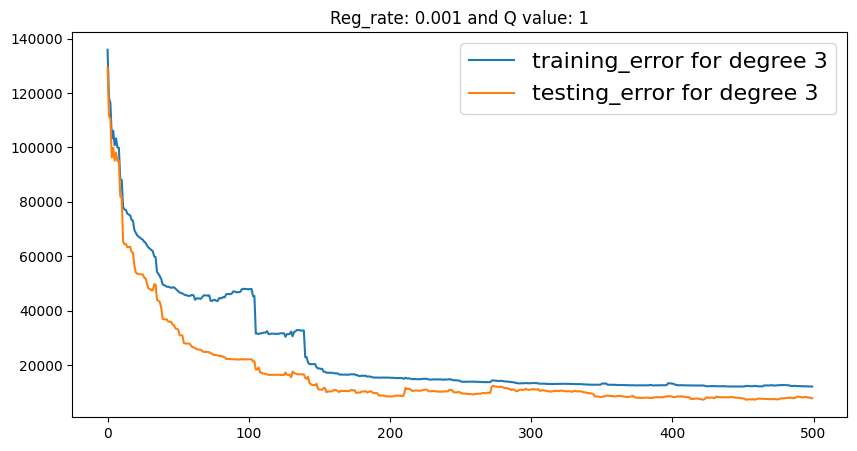

Training Error: 15149.623889439275, Testing Error: 11139.463008159122


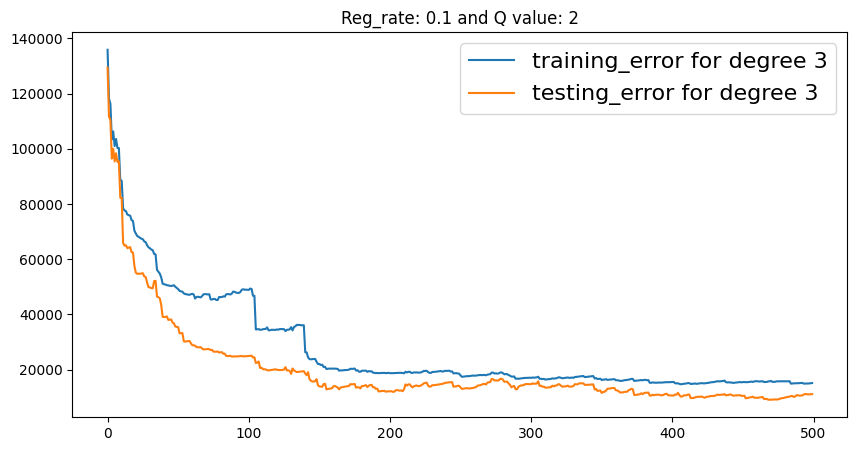

Training Error: 64511.785201208884, Testing Error: 58514.882858315206


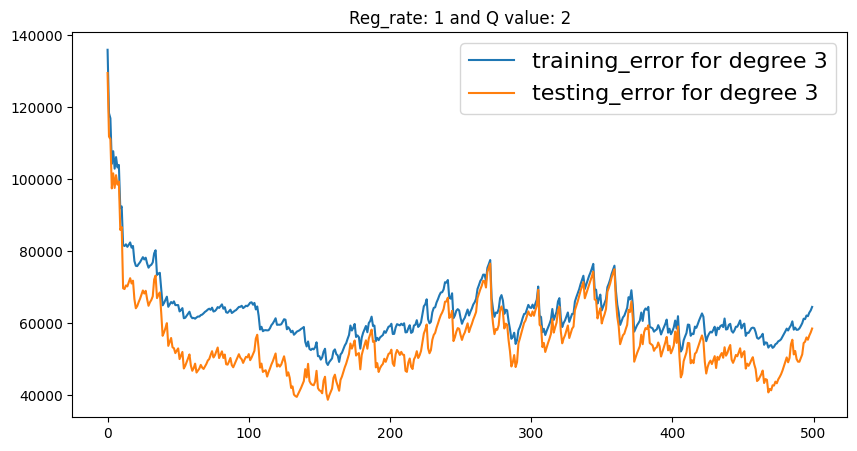

Training Error: 12169.271316274091, Testing Error: 7940.594501685855


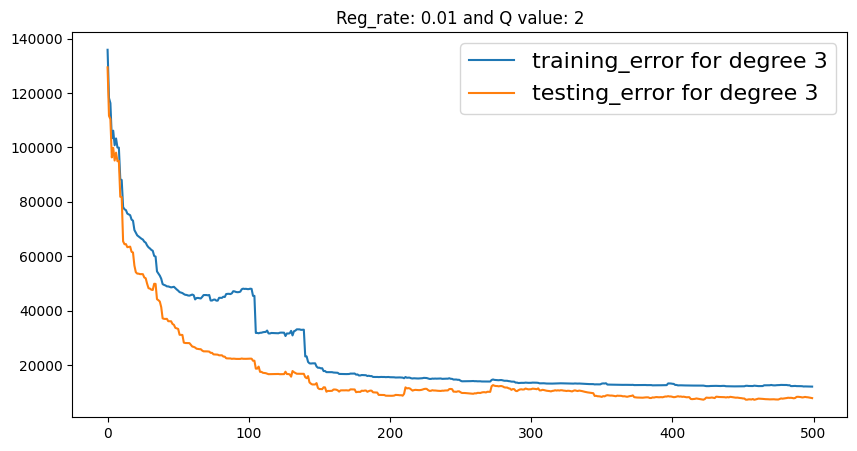

Training Error: 12130.569605827872, Testing Error: 7833.157676731767


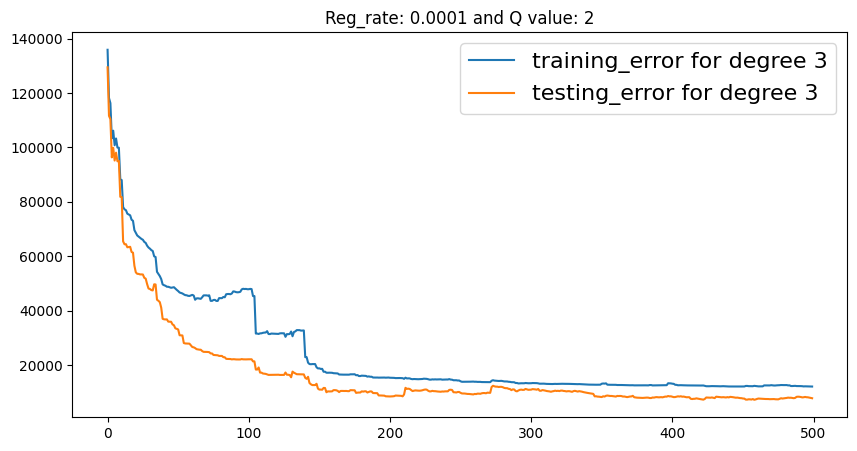

Training Error: 12130.777337628122, Testing Error: 7840.145449882348


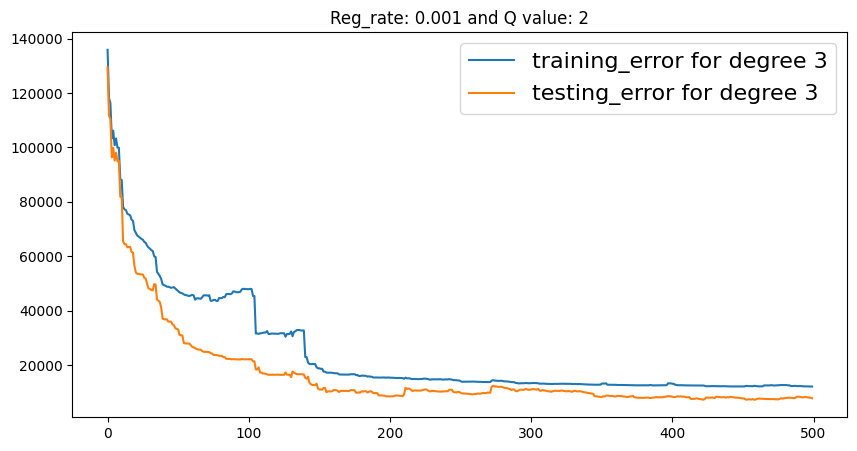

<ipython-input-10-fca6f00a55a0>:25: RuntimeWarning: overflow encountered in power
  error_tr = np.sum((np.square(errors_train))) + reg_rate * np.sum(np.abs(weights) ** q)
<ipython-input-10-fca6f00a55a0>:32: RuntimeWarning: overflow encountered in power
  error_te = np.sum((np.square(errors_test))) + reg_rate * np.sum(np.abs(weights) ** q)
<ipython-input-10-fca6f00a55a0>:25: RuntimeWarning: overflow encountered in square
  error_tr = np.sum((np.square(errors_train))) + reg_rate * np.sum(np.abs(weights) ** q)
<ipython-input-10-fca6f00a55a0>:32: RuntimeWarning: overflow encountered in square
  error_te = np.sum((np.square(errors_test))) + reg_rate * np.sum(np.abs(weights) ** q)
<ipython-input-10-fca6f00a55a0>:19: RuntimeWarning: overflow encountered in double_scalars
  dif_term = q * np.sign(weights[0, j]) * (np.abs(weights[0, j]) ** (q - 1))
<ipython-input-10-fca6f00a55a0>:20: RuntimeWarning: invalid value encountered in subtract
  gradient[0,j] = (-1 * (x[j] * (y - np.dot(x, weights.T))

Training Error: nan, Testing Error: nan


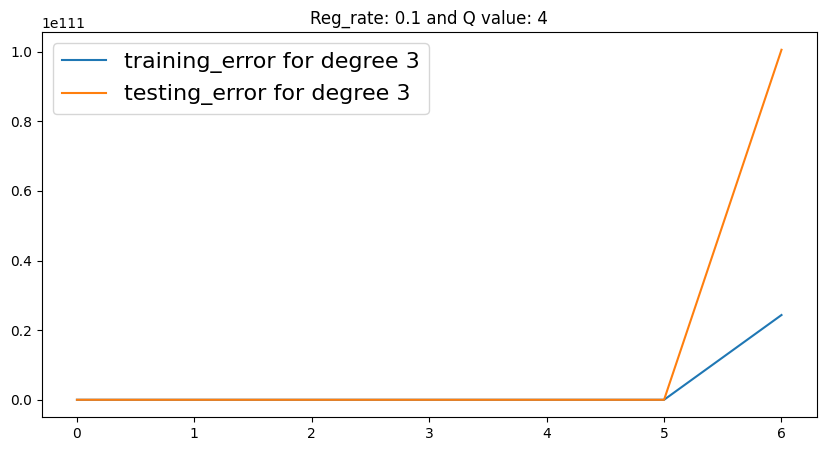

Training Error: nan, Testing Error: nan


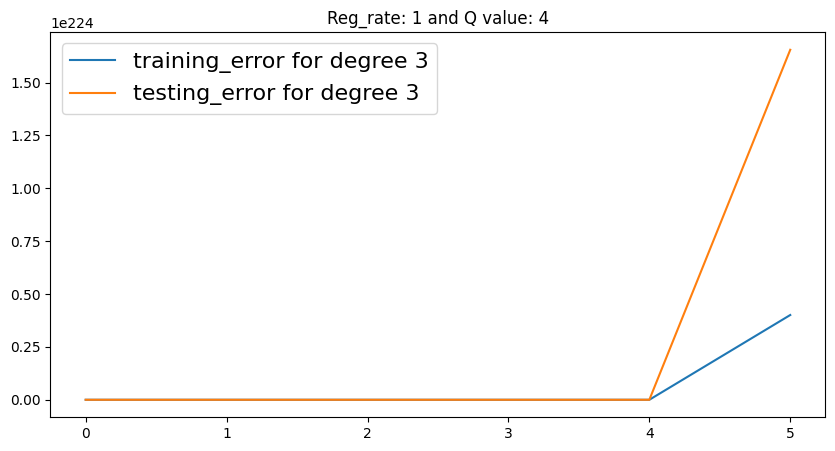

Training Error: 125190.37430421988, Testing Error: 118999.12610235879


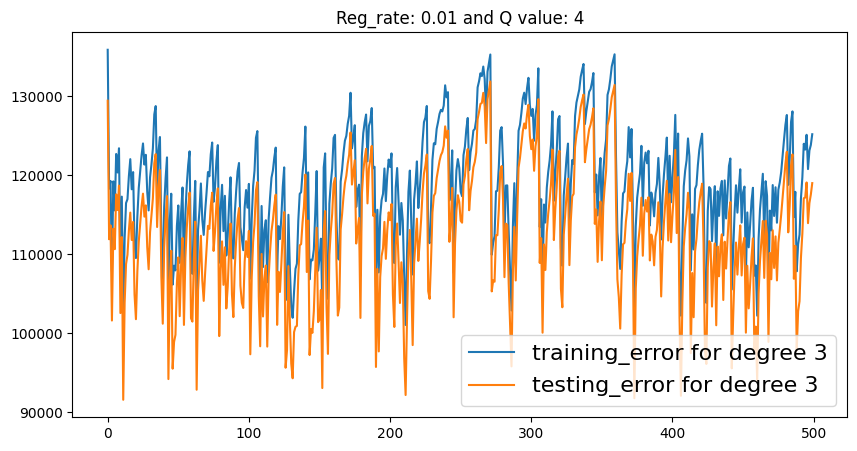

Training Error: 75360.46412107903, Testing Error: 64400.4359022029


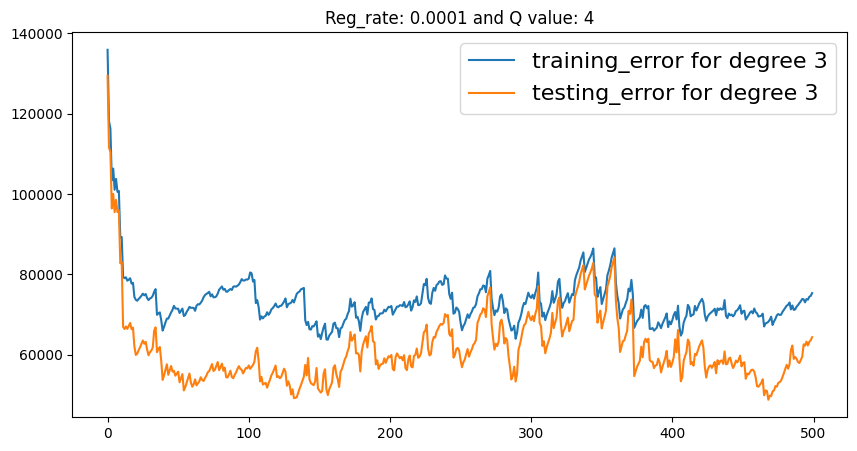

Training Error: 103367.83455297316, Testing Error: 94954.47305376948


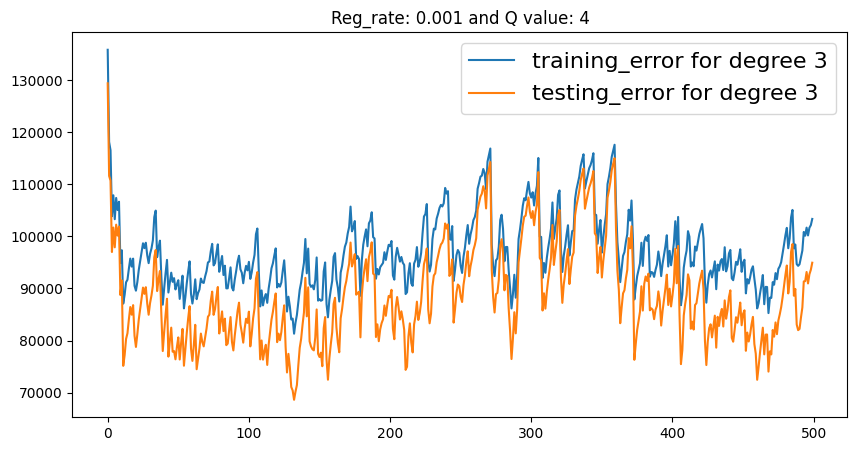

In [11]:
for q in {0.5,1,2,4}:
  for reg_r in {0.0001,0.001,0.01,0.1,1}:
    dum = np.zeros((X.shape[0],1))
    X_transformed = poly_trans(X_norm,dum,3)
    X_transformed = X_transformed[:,1:]

    X_transformed = np.delete(X_transformed,0,axis = 1)
    X_transformed = (X_transformed-np.mean(X_transformed,axis = 0))/np.std(X_transformed,axis = 0)
    X_transformed = np.insert(X_transformed,0,1,axis = 1)

    X_train, X_test, Y_train, Y_test, Xo_train, Xo_test = split_data(X_transformed, Y, X_norm, indices, test_size = 0.2, random_state = 0)

    weights,training_error,testing_error = sgd_reg(X_train, Y_train ,X_test, Y_test,q,reg_r)
    pred_y = np.dot(X_test,weights.T)
    plt.figure(figsize=(10,5))
    plt.title(f'Reg_rate: {reg_r} and Q value: {q}')
    plt.plot(training_error, label= f'training_error for degree {3}')
    plt.plot(testing_error, label= f'testing_error for degree {3}')
    plt.legend(prop={'size': 16})
    plt.show()